In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop the unnamed column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y_win = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,  # Team 1 Win
                 1)  # Team 2 Win or Draw

y_draw = np.where(data["Team 1 Score"] == data["Team 2 Score"], 0,  # Draw
                  1)  # Not Draw

y_loss = np.where(data["Team 1 Score"] < data["Team 2 Score"], 0,  # Team 2 Win
                  1)  # Team 1 Win or Draw

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models
base_models = [
    ('win_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('draw_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('loss_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42))
]

# Stacking Classifier
# meta_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
# stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
# stacked_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier())

# Store results
accuracy_list = []
classification_reports = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the stacking model
    stacked_model.fit(X_train_scaled, y_win[train_index])  # Using one target for training

    # Make predictions
    y_pred = stacked_model.predict(X_test_scaled)
    
    # Calculate accuracy and store results
    accuracy = accuracy_score(y_win[test_index], y_pred)
    accuracy_list.append(accuracy)
    classification_reports.append(classification_report(y_win[test_index], y_pred, output_dict=True))

# Output average accuracy and classification reporta
average_accuracy = np.mean(accuracy_list)
print("Average Accuracy:", average_accuracy)

# Print detailed classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"\nClassification Report for Fold {i+1}:\n", report)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier

# Load your dataset
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop the unnamed column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Drop H2H columns
h2h_columns = [
    'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'
]
data = data.drop(columns=h2h_columns)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y_win = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,  # Team 1 Win
                 1)  # Team 2 Win or Draw

y_draw = np.where(data["Team 1 Score"] == data["Team 2 Score"], 0,  # Draw
                  1)  # Not Draw

y_loss = np.where(data["Team 1 Score"] < data["Team 2 Score"], 0,  # Team 2 Win
                  1)  # Team 1 Win or Draw

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models
base_models = [
    ('win_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('draw_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('loss_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42))
]

# Stacking Classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Store results
accuracy_list = []
classification_reports = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the stacking model
    stacked_model.fit(X_train_scaled, y_win[train_index])  # Using one target for training

    # Make predictions
    y_pred = stacked_model.predict(X_test_scaled)
    
    # Calculate accuracy and store results
    accuracy = accuracy_score(y_win[test_index], y_pred)
    accuracy_list.append(accuracy)
    classification_reports.append(classification_report(y_win[test_index], y_pred, output_dict=True))

# Output average accuracy and classification reports
average_accuracy = np.mean(accuracy_list)
print("Average Accuracy:", average_accuracy)

# Print detailed classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"\nClassification Report for Fold {i+1}:\n", report)


Average Accuracy: 0.6399470899470899

Classification Report for Fold 1:
 {'0': {'precision': 0.7272727272727273, 'recall': 0.5333333333333333, 'f1-score': 0.6153846153846154, 'support': 15.0}, '1': {'precision': 0.5882352941176471, 'recall': 0.7692307692307693, 'f1-score': 0.6666666666666666, 'support': 13.0}, 'accuracy': 0.6428571428571429, 'macro avg': {'precision': 0.6577540106951871, 'recall': 0.6512820512820513, 'f1-score': 0.641025641025641, 'support': 28.0}, 'weighted avg': {'precision': 0.6627196333078686, 'recall': 0.6428571428571429, 'f1-score': 0.6391941391941393, 'support': 28.0}}

Classification Report for Fold 2:
 {'0': {'precision': 0.4, 'recall': 0.6666666666666666, 'f1-score': 0.5, 'support': 9.0}, '1': {'precision': 0.7692307692307693, 'recall': 0.5263157894736842, 'f1-score': 0.625, 'support': 19.0}, 'accuracy': 0.5714285714285714, 'macro avg': {'precision': 0.5846153846153846, 'recall': 0.5964912280701754, 'f1-score': 0.5625, 'support': 28.0}, 'weighted avg': {'prec

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop the unnamed column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Drop H2H columns
h2h_columns = [
    'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'
]
data = data.drop(columns=h2h_columns)

# Define features and targets for goal predictions
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
team_1_goals = [np.where(data["Team 1 Score"] == i, 1, 0) for i in range(6)]
team_2_goals = [np.where(data["Team 2 Score"] == i, 1, 0) for i in range(6)]

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model template
def train_model(X, y, kf):
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train Logistic Regression model
        model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)

    return np.mean(accuracy_list)

# Train individual models and record accuracies
team_1_accuracies = []
team_2_accuracies = []

print("Training individual models for Team 1 goals...")
for i, y in enumerate(team_1_goals):
    accuracy = train_model(X, y, kf)
    team_1_accuracies.append(accuracy)
    print(f"Team 1 scoring {i} goals - Accuracy: {accuracy:.4f}")

print("\nTraining individual models for Team 2 goals...")
for i, y in enumerate(team_2_goals):
    accuracy = train_model(X, y, kf)
    team_2_accuracies.append(accuracy)
    print(f"Team 2 scoring {i} goals - Accuracy: {accuracy:.4f}")

# Output average accuracies
print("\nAverage accuracies:")
print(f"Team 1 Models: {np.mean(team_1_accuracies):.4f}")
print(f"Team 2 Models: {np.mean(team_2_accuracies):.4f}")


Training individual models for Team 1 goals...
Team 1 scoring 0 goals - Accuracy: 0.8270
Team 1 scoring 1 goals - Accuracy: 0.4593
Team 1 scoring 2 goals - Accuracy: 0.5193
Team 1 scoring 3 goals - Accuracy: 0.1585


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without featu

Team 1 scoring 4 goals - Accuracy: 0.5778


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score'])  # Features

# Create binary target variables for >0, >1, >2, and >3 goals
y_gt_0 = (data['Team 1 Score'] > 0).astype(int)
y_gt_1 = (data['Team 1 Score'] > 1).astype(int)
y_gt_2 = (data['Team 1 Score'] > 2).astype(int)
y_gt_3 = (data['Team 1 Score'] > 3).astype(int)

# List of targets and model names
targets = [y_gt_0, y_gt_1, y_gt_2, y_gt_3]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals', '> 3 Goals']

# Dictionary to store models and their results
results = {}

# Loop through each target and train a binary classifier
for i, y in enumerate(targets):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a binary classification model (using Random Forest as an example)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_names[i]] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix
    }

# Print results for each model
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability


Model: > 0 Goals
Accuracy: 0.8571428571428571
Confusion Matrix:
[[ 0  4]
 [ 0 24]]

Model: > 1 Goals
Accuracy: 0.6071428571428571
Confusion Matrix:
[[ 7  5]
 [ 6 10]]

Model: > 2 Goals
Accuracy: 0.7142857142857143
Confusion Matrix:
[[19  1]
 [ 7  1]]

Model: > 3 Goals
Accuracy: 0.8928571428571429
Confusion Matrix:
[[25  0]
 [ 3  0]]



In [17]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score'])  # Features

# Create binary target variables for >0, >1, >2, and >3 goals
y_gt_0 = (data['Team 1 Score'] > 0).astype(int)
y_gt_1 = (data['Team 1 Score'] > 1).astype(int)
y_gt_2 = (data['Team 1 Score'] > 2).astype(int)
y_gt_3 = (data['Team 1 Score'] > 3).astype(int)

# List of targets and model names
targets = [y_gt_0, y_gt_1, y_gt_2, y_gt_3]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals', '> 3 Goals']

# Dictionary to store models and their results
results = {}

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each target and train a binary classifier using K-Fold
for i, y in enumerate(targets):
    accuracies = []
    conf_matrices = []

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train a binary classification model (using Random Forest as an example)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Store results
        accuracies.append(accuracy)
        conf_matrices.append(conf_matrix)

    # Average accuracy and confusion matrix over all folds
    results[model_names[i]] = {
        'average_accuracy': np.mean(accuracies),
        'confusion_matrix': np.sum(conf_matrices, axis=0)
    }

# Print results for each model
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability


Model: > 0 Goals
Average Accuracy: 0.8127
Confusion Matrix:
[[  1  23]
 [  3 112]]

Model: > 1 Goals
Average Accuracy: 0.5608
Confusion Matrix:
[[32 36]
 [25 46]]

Model: > 2 Goals
Average Accuracy: 0.7471
Confusion Matrix:
[[100   5]
 [ 30   4]]

Model: > 3 Goals
Average Accuracy: 0.8915
Confusion Matrix:
[[123   3]
 [ 12   1]]



Model: > 0 Goals
Average Accuracy: 0.7839
Confusion Matrix:
[[  3  27]
 [  3 106]]

Model: > 1 Goals
Average Accuracy: 0.5902
Confusion Matrix:
[[68 19]
 [38 14]]

Model: > 2 Goals
Average Accuracy: 0.8272
Confusion Matrix:
[[115   2]
 [ 22   0]]

Model: > 3 Goals
Average Accuracy: 0.9497
Confusion Matrix:
[[132   0]
 [  7   0]]

Model: > 0 Goals
Average Accuracy: 0.7839
Confusion Matrix:
[[  3  27]
 [  3 106]]



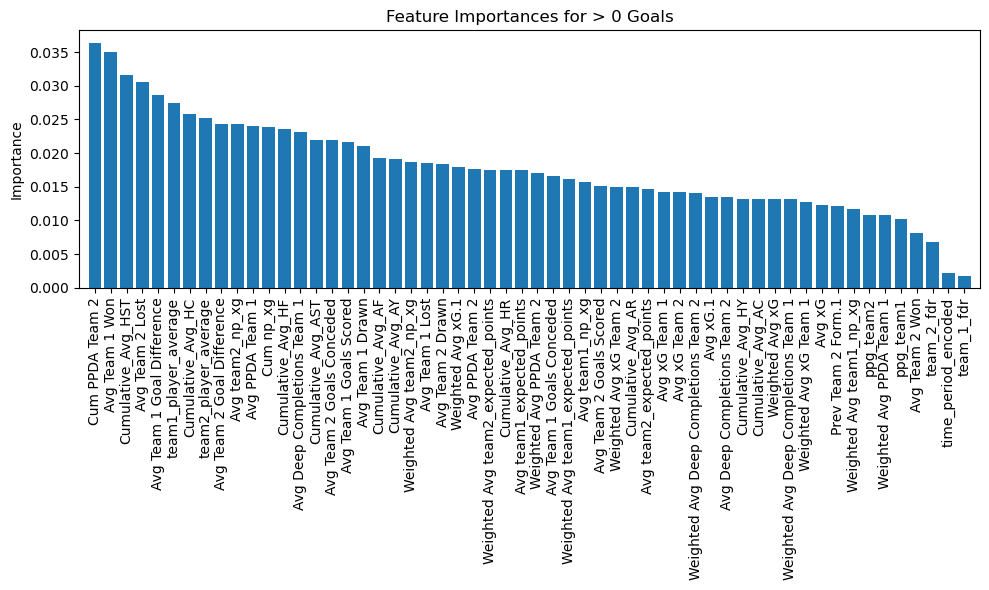

Model: > 1 Goals
Average Accuracy: 0.5902
Confusion Matrix:
[[68 19]
 [38 14]]



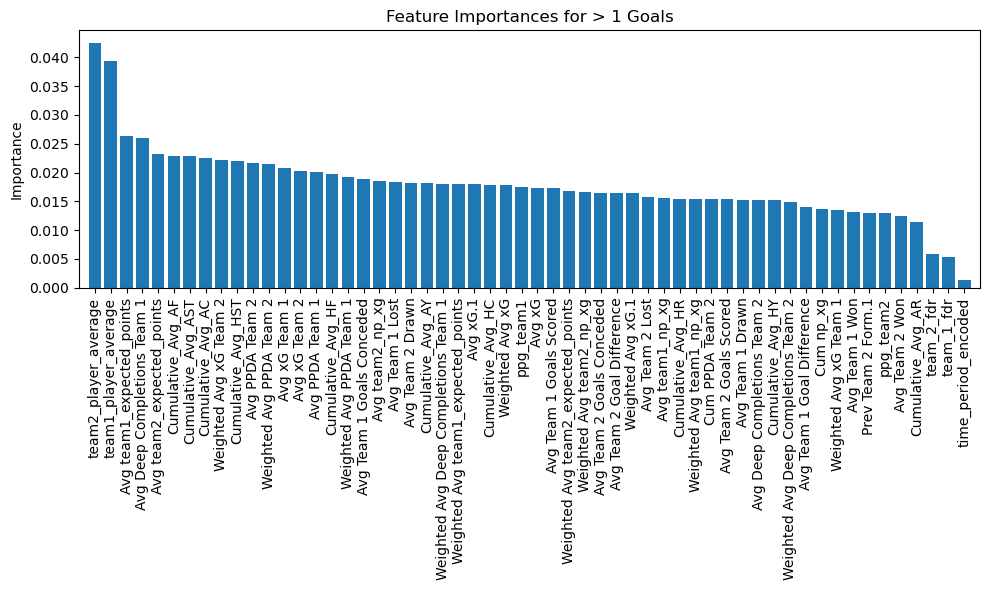

Model: > 2 Goals
Average Accuracy: 0.8272
Confusion Matrix:
[[115   2]
 [ 22   0]]



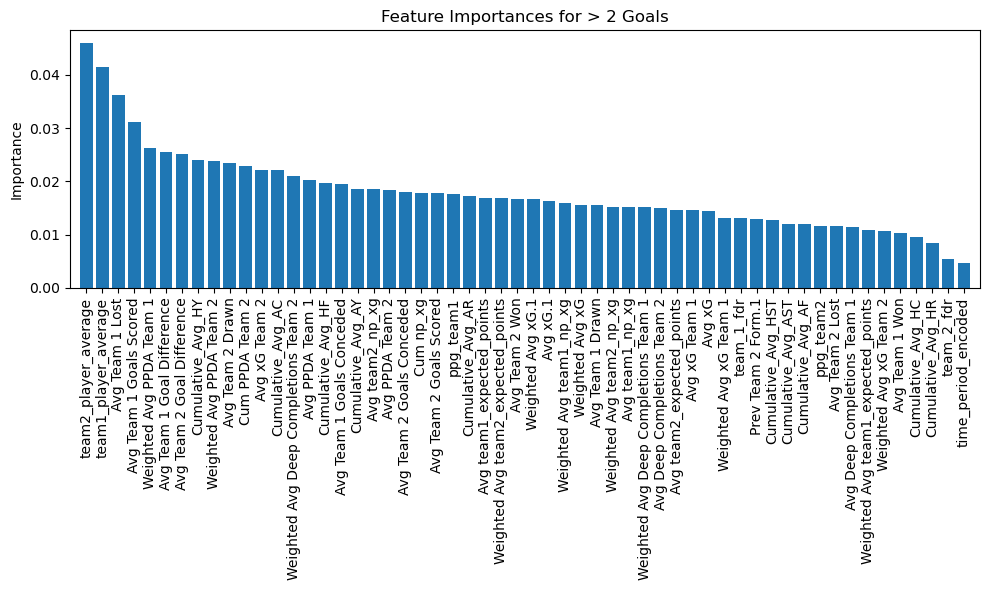

Model: > 3 Goals
Average Accuracy: 0.9497
Confusion Matrix:
[[132   0]
 [  7   0]]



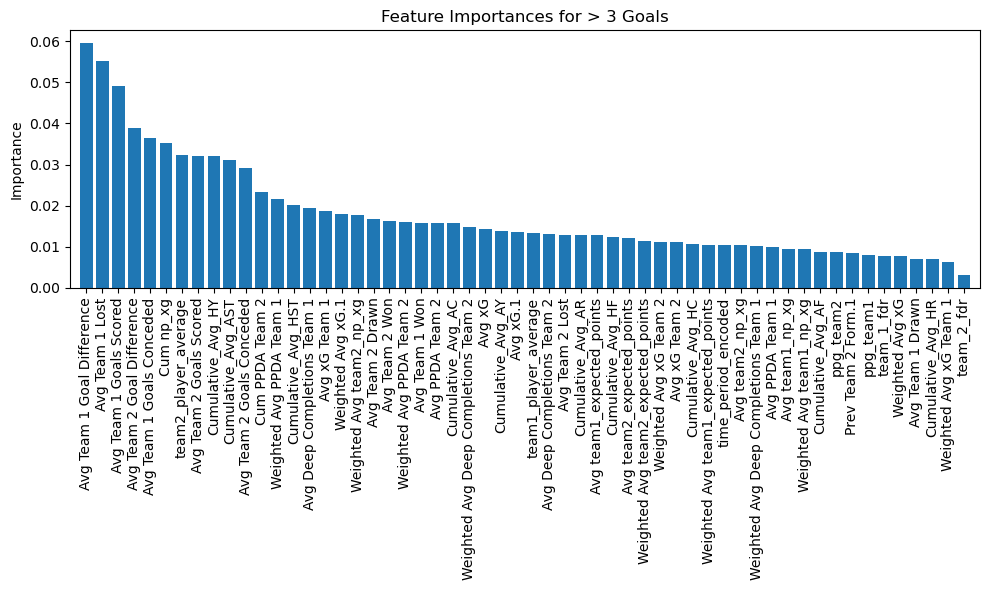

In [22]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 2 Score'])  # Features

# Create binary target variables for Team 2 scores >0, >1, >2, and >3 goals
y_gt_0 = (data['Team 2 Score'] > 0).astype(int)
y_gt_1 = (data['Team 2 Score'] > 1).astype(int)
y_gt_2 = (data['Team 2 Score'] > 2).astype(int)
y_gt_3 = (data['Team 2 Score'] > 3).astype(int)

# List of targets and model names for Team 2
targets = [y_gt_0, y_gt_1, y_gt_2, y_gt_3]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals', '> 3 Goals']

# Dictionary to store models and their results
results = {}

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each target and train a binary classifier using K-Fold
for i, y in enumerate(targets):
    accuracies = []
    conf_matrices = []

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train a binary classification model (using Random Forest as an example)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Specify labels explicitly
        
        # Store results
        accuracies.append(accuracy)
        conf_matrices.append(conf_matrix)

    # Average accuracy and confusion matrix over all folds
    results[model_names[i]] = {
        'average_accuracy': np.mean(accuracies),
        'confusion_matrix': np.sum(conf_matrices, axis=0)
    }

# Print results for each model for Team 2
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability

# Loop through each target and train a binary classifier using K-Fold
for i, y in enumerate(targets):
    accuracies = []
    conf_matrices = []
    feature_importances = np.zeros(X.shape[1])  # Initialize feature importances

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train a binary classification model (using Random Forest as an example)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Specify labels explicitly
        
        # Store results
        accuracies.append(accuracy)
        conf_matrices.append(conf_matrix)

        # Add feature importances for this fold
        feature_importances += model.feature_importances_

    # Average accuracy and confusion matrix over all folds
    results[model_names[i]] = {
        'average_accuracy': np.mean(accuracies),
        'confusion_matrix': np.sum(conf_matrices, axis=0),
        'feature_importance': feature_importances / kf.get_n_splits()  # Normalize by number of splits
    }

# Print results for each model for Team 2
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    indices = np.argsort(metrics['feature_importance'])[::-1]
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(X.shape[1]), metrics['feature_importance'][indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


Model: > 0 Goals
Accuracy: 0.8571
Confusion Matrix:
[[ 0  4]
 [ 0 24]]



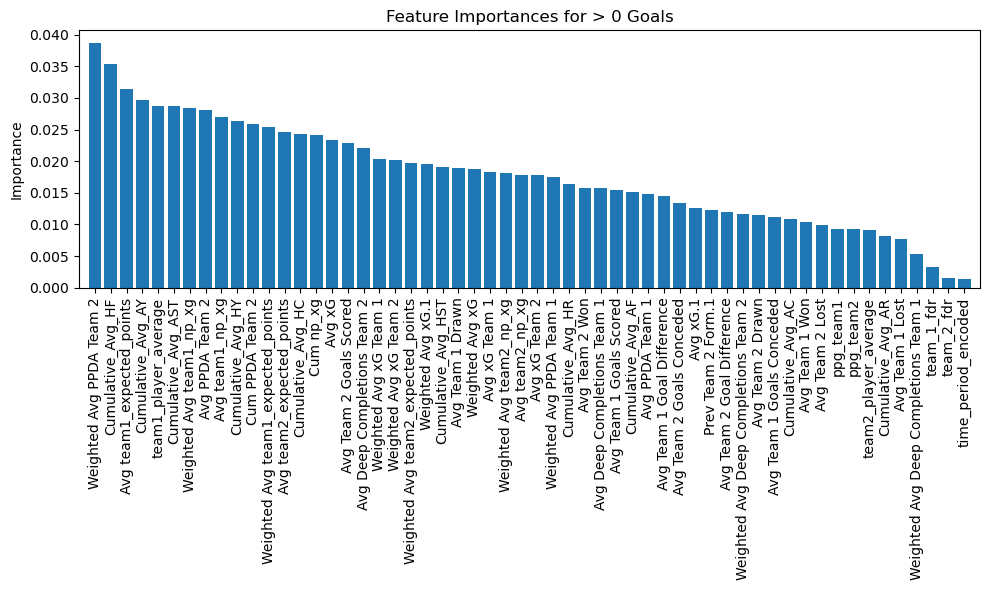

Model: > 1 Goals
Accuracy: 0.6071
Confusion Matrix:
[[ 7  5]
 [ 6 10]]



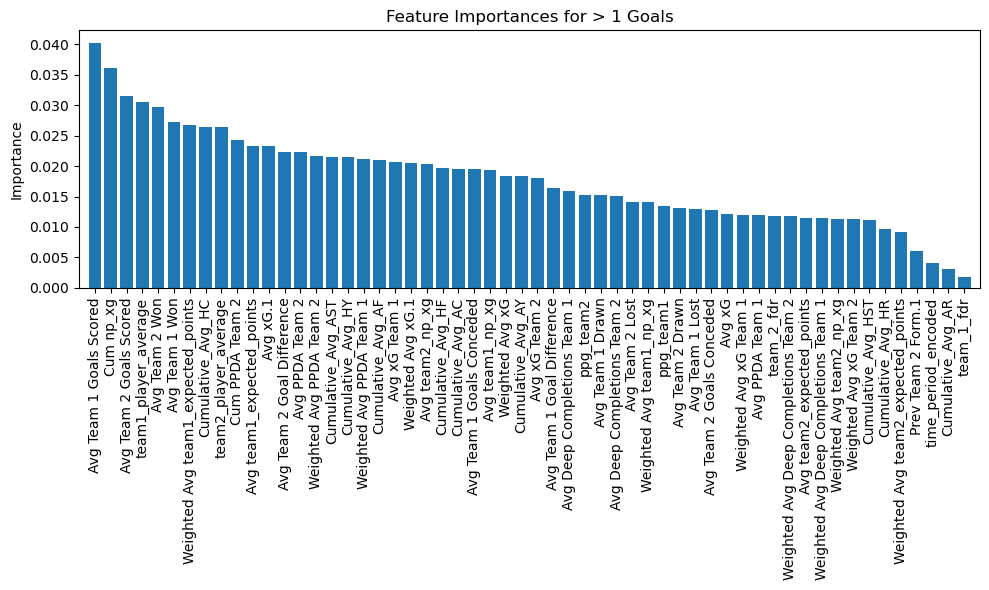

Model: > 2 Goals
Accuracy: 0.7143
Confusion Matrix:
[[19  1]
 [ 7  1]]



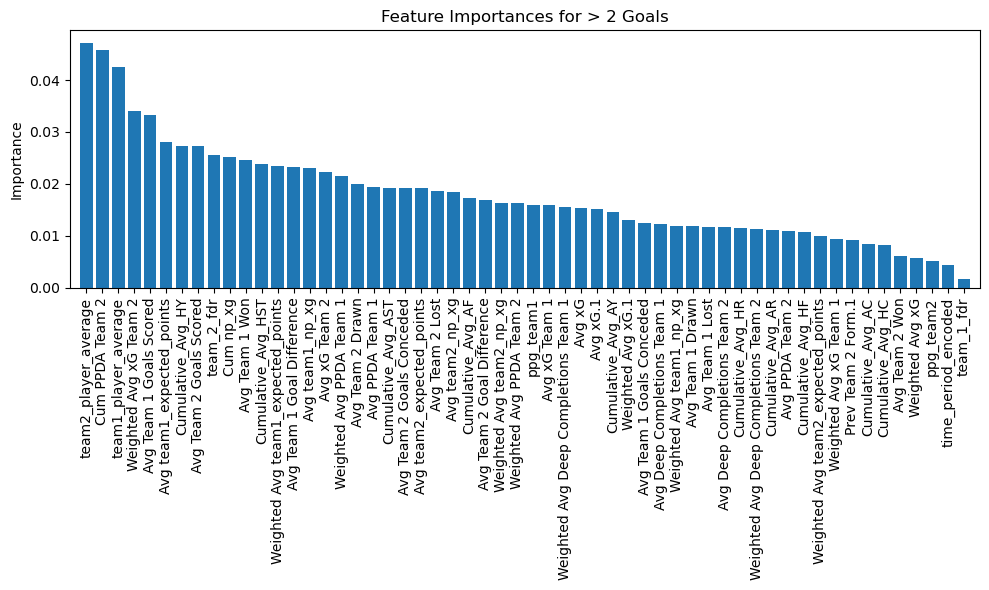

Model: > 3 Goals
Accuracy: 0.8929
Confusion Matrix:
[[25  0]
 [ 3  0]]



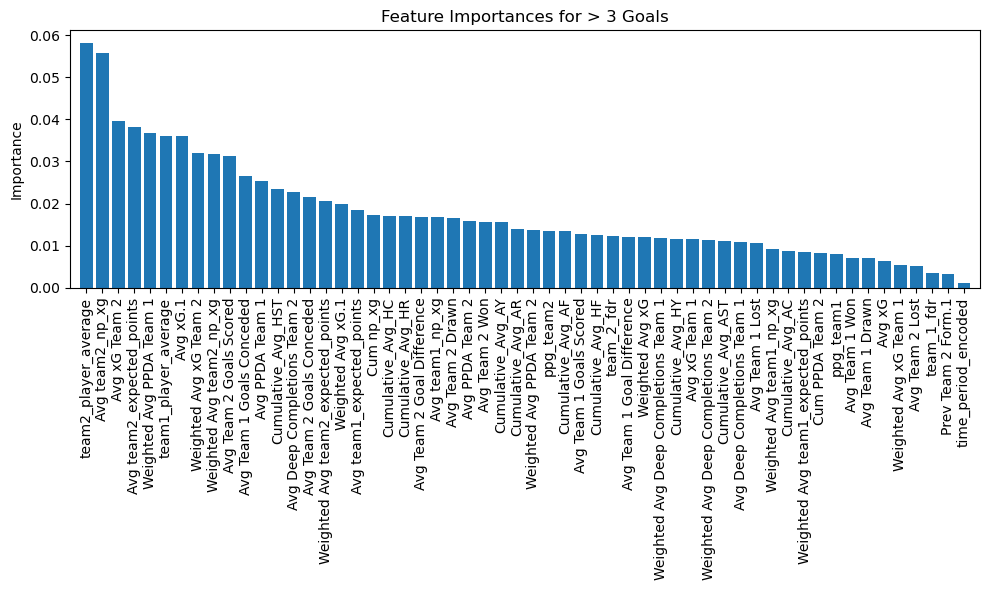

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score'])  # Features

# Create binary target variables for Team 1 goals >0, >1, >2, and >3
y_gt_0 = (data['Team 1 Score'] > 0).astype(int)
y_gt_1 = (data['Team 1 Score'] > 1).astype(int)
y_gt_2 = (data['Team 1 Score'] > 2).astype(int)
y_gt_3 = (data['Team 1 Score'] > 3).astype(int)

# List of targets and model names
targets = [y_gt_0, y_gt_1, y_gt_2, y_gt_3]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals', '> 3 Goals']

# Dictionary to store models and their results
results = {}

# Loop through each target and train a binary classifier
for i, y in enumerate(targets):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a binary classification model (using Random Forest as an example)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_names[i]] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'feature_importance': model.feature_importances_
    }

# Print results for each model
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    indices = np.argsort(metrics['feature_importance'])[::-1]  # Sort feature importances
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(X.shape[1]), metrics['feature_importance'][indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features and target variable
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features
data['Outcome'] = np.where(data['Team 1 Score'] > data['Team 2 Score'], 1, 
                           np.where(data['Team 1 Score'] < data['Team 2 Score'], -1, 0))
y = data['Outcome']  # Target variable

# Prepare to store predictions from the base models
base_predictions_team_1 = []
base_predictions_team_2 = []

# Train models for Team 1 and Team 2 for >0, >1, >2, >3 goals
for i in range(4):  # For each threshold of goals
    # Prepare targets for Team 1 and Team 2
    y_gt_1 = (data['Team 1 Score'] > i).astype(int)  # Targets for Team 1
    y_gt_2 = (data['Team 2 Score'] > i).astype(int)  # Targets for Team 2
    
    # Split the data into training and testing sets
    X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y_gt_1, test_size=0.2, random_state=42)
    _, _, y_train_2, y_test_2 = train_test_split(X, y_gt_2, test_size=0.2, random_state=42)

    # Train a Random Forest model for Team 1
    model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_1.fit(X_train, y_train_1)
    base_predictions_team_1.append(model_1.predict(X))  # Predict for the entire dataset

    # Train a Random Forest model for Team 2
    model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_2.fit(X_train, y_train_2)
    base_predictions_team_2.append(model_2.predict(X))  # Predict for the entire dataset

# Convert predictions to a DataFrame
base_predictions_team_1 = np.array(base_predictions_team_1).T  # Shape: (num_samples, 4)
base_predictions_team_2 = np.array(base_predictions_team_2).T  # Shape: (num_samples, 4)

# Stack predictions
stacked_predictions = np.hstack((base_predictions_team_1, base_predictions_team_2))

# Prepare the final dataset for the stacking model
X_final = stacked_predictions  # Features for stacking model
y_final = y.values  # Target variable

# Split for the stacking model
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Initialize the stacking model
stacking_model = StackingClassifier(
    estimators=[
        ('rf1', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_final_train, y_final_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_final_test)

# Evaluate the performance
accuracy = accuracy_score(y_final_test, y_pred)
report = classification_report(y_final_test, y_pred, target_names=['Team 2 Wins', 'Draw', 'Team 1 Wins'])

# Print results
print(f'Accuracy of the Stacking Model: {accuracy:.4f}')
print("Classification Report:\n", report)


Accuracy of the Stacking Model: 0.4643
Classification Report:
               precision    recall  f1-score   support

 Team 2 Wins       0.50      0.33      0.40         6
        Draw       0.25      0.43      0.32         7
 Team 1 Wins       0.67      0.53      0.59        15

    accuracy                           0.46        28
   macro avg       0.47      0.43      0.44        28
weighted avg       0.53      0.46      0.48        28



Accuracy of the Stacking Model: 0.6786
Confusion Matrix:
[[19  1]
 [ 8  0]]


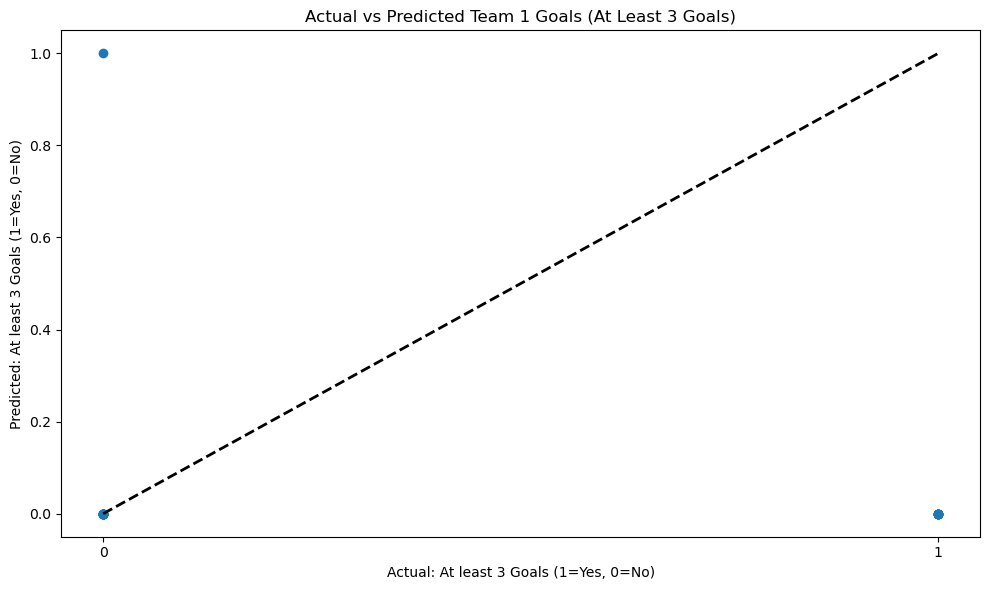

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score'])  # Features

# Create binary target variable for Team 1 scoring at least 2.5 goals (i.e., 3 or more goals)
y_at_least_3_goals = (data['Team 1 Score'] >= 3).astype(int)

# Number of folds for cross-validation
k_folds = 5

# Store predictions for stacking
predictions = np.zeros((len(X), 4))  # Shape: (num_samples, num_targets)

# Loop through each target (previously defined >0, >1, >2, >3) and train classifiers with k-fold cross-validation
for i in range(4):
    # Generate a target for >i goals
    y = (data['Team 1 Score'] > i).astype(int)

    # Initialize KFold
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Generate cross-validated predictions for the current model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    predictions[:, i] = cross_val_predict(model, X, y, cv=kf)  # Store predictions for the whole dataset

# Use the predictions as features for the stacking classifier
X_stacked = predictions  # Use the predictions as features

# Split the stacked features and target variable for training
X_train_stacked, X_test_stacked, y_train_stacked, y_test_stacked = train_test_split(X_stacked, y_at_least_3_goals, test_size=0.2, random_state=42)

# Initialize the stacking classifier with classification models
stacking_classifier = StackingClassifier(
    estimators=[
        ('rf1', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_classifier.fit(X_train_stacked, y_train_stacked)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test_stacked)

# Evaluate the performance
accuracy = accuracy_score(y_test_stacked, y_pred)
conf_matrix = confusion_matrix(y_test_stacked, y_pred)

# Print results
print(f'Accuracy of the Stacking Model: {accuracy:.4f}')
print("Confusion Matrix:")
print(conf_matrix)

# Plot actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test_stacked, y_pred)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual: At least 3 Goals (1=Yes, 0=No)')
plt.ylabel('Predicted: At least 3 Goals (1=Yes, 0=No)')
plt.title('Actual vs Predicted Team 1 Goals (At Least 3 Goals)')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()


Accuracy of the Stacking Model for Team 1: 0.6071
Confusion Matrix for Team 1:
[[17  3]
 [ 8  0]]


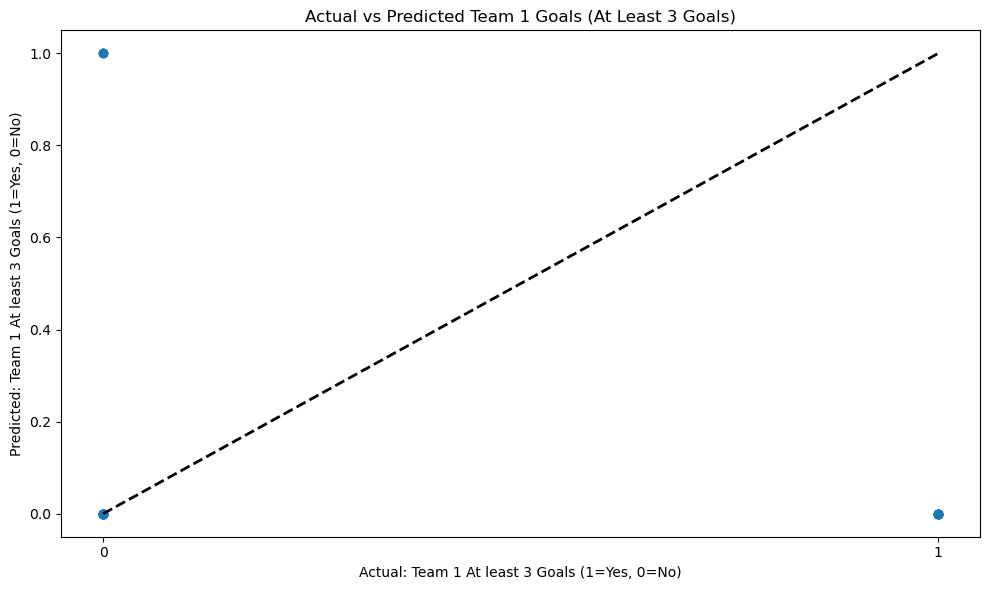

Accuracy of the Stacking Model for Team 2: 0.9286
Confusion Matrix for Team 2:
[[26  0]
 [ 2  0]]


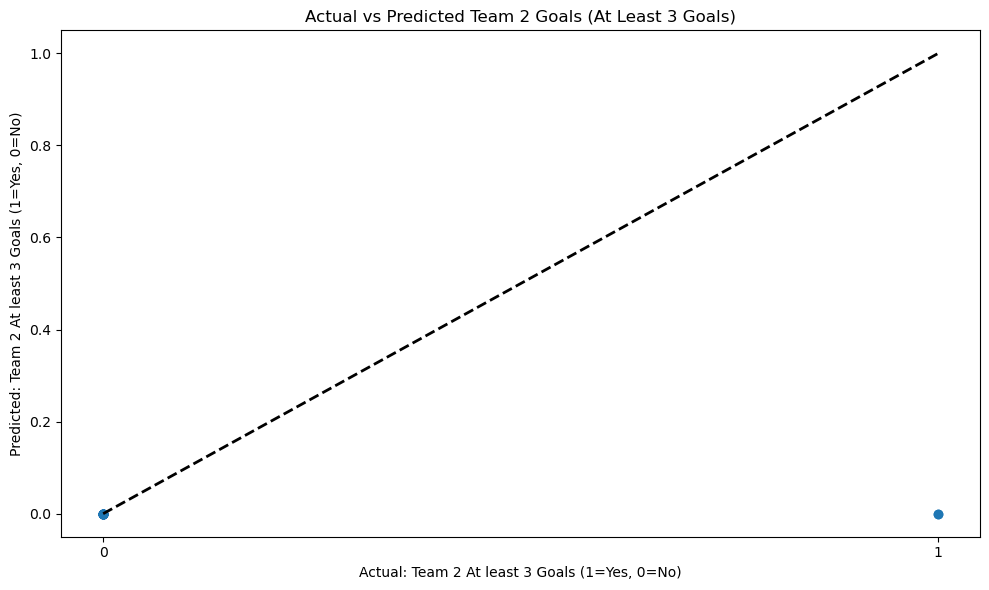

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Prev Team 2 Goal Difference', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4',
], inplace=True)

# Define features for Team 1
X_team1 = data.drop(columns=['Team 1 Score'])  # Features for Team 1

# Create binary target variable for Team 1 scoring at least 2.5 goals (i.e., 3 or more goals)
y_at_least_3_goals_team1 = (data['Team 1 Score'] >= 3).astype(int)

# Define features for Team 2
X_team2 = data.drop(columns=['Team 2 Score'])  # Features for Team 2

# Create binary target variable for Team 2 scoring at least 2.5 goals (i.e., 3 or more goals)
y_at_least_3_goals_team2 = (data['Team 2 Score'] >= 3).astype(int)

# Number of folds for cross-validation
k_folds = 5

# Store predictions for stacking for Team 1
predictions_team1 = np.zeros((len(X_team1), 4))  # Shape: (num_samples, num_targets)

# Loop through each target (previously defined >0, >1, >2, >3) and train classifiers with k-fold cross-validation for Team 1
for i in range(4):
    # Generate a target for >i goals
    y = (data['Team 1 Score'] > i).astype(int)

    # Initialize KFold
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Generate cross-validated predictions for the current model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    predictions_team1[:, i] = cross_val_predict(model, X_team1, y, cv=kf)  # Store predictions for the whole dataset

# Use the predictions as features for the stacking classifier for Team 1
X_stacked_team1 = predictions_team1  # Use the predictions as features

# Split the stacked features and target variable for training Team 1
X_train_stacked_team1, X_test_stacked_team1, y_train_stacked_team1, y_test_stacked_team1 = train_test_split(X_stacked_team1, y_at_least_3_goals_team1, test_size=0.2, random_state=42)

# Initialize the stacking classifier for Team 1
stacking_classifier_team1 = StackingClassifier(
    estimators=[
        ('rf1', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model for Team 1
stacking_classifier_team1.fit(X_train_stacked_team1, y_train_stacked_team1)

# Make predictions on the test set for Team 1
y_pred_team1 = stacking_classifier_team1.predict(X_test_stacked_team1)

# Evaluate the performance for Team 1
accuracy_team1 = accuracy_score(y_test_stacked_team1, y_pred_team1)
conf_matrix_team1 = confusion_matrix(y_test_stacked_team1, y_pred_team1)

# Print results for Team 1
print(f'Accuracy of the Stacking Model for Team 1: {accuracy_team1:.4f}')
print("Confusion Matrix for Team 1:")
print(conf_matrix_team1)

# Plot actual vs predicted scores for Team 1
plt.figure(figsize=(10, 6))
plt.scatter(y_test_stacked_team1, y_pred_team1)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual: Team 1 At least 3 Goals (1=Yes, 0=No)')
plt.ylabel('Predicted: Team 1 At least 3 Goals (1=Yes, 0=No)')
plt.title('Actual vs Predicted Team 1 Goals (At Least 3 Goals)')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

# Now repeat the process for Team 2

# Store predictions for stacking for Team 2
predictions_team2 = np.zeros((len(X_team2), 4))  # Shape: (num_samples, num_targets)

# Loop through each target (previously defined >0, >1, >2, >3) and train classifiers with k-fold cross-validation for Team 2
for i in range(4):
    # Generate a target for >i goals for Team 2
    y = (data['Team 2 Score'] > i).astype(int)

    # Initialize KFold
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Generate cross-validated predictions for the current model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    predictions_team2[:, i] = cross_val_predict(model, X_team2, y, cv=kf)  # Store predictions for the whole dataset

# Use the predictions as features for the stacking classifier for Team 2
X_stacked_team2 = predictions_team2  # Use the predictions as features

# Split the stacked features and target variable for training Team 2
X_train_stacked_team2, X_test_stacked_team2, y_train_stacked_team2, y_test_stacked_team2 = train_test_split(X_stacked_team2, y_at_least_3_goals_team2, test_size=0.2, random_state=42)

# Initialize the stacking classifier for Team 2
stacking_classifier_team2 = StackingClassifier(
    estimators=[
        ('rf1', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model for Team 2
stacking_classifier_team2.fit(X_train_stacked_team2, y_train_stacked_team2)

# Make predictions on the test set for Team 2
y_pred_team2 = stacking_classifier_team2.predict(X_test_stacked_team2)

# Evaluate the performance for Team 2
accuracy_team2 = accuracy_score(y_test_stacked_team2, y_pred_team2)
conf_matrix_team2 = confusion_matrix(y_test_stacked_team2, y_pred_team2)

# Print results for Team 2
print(f'Accuracy of the Stacking Model for Team 2: {accuracy_team2:.4f}')
print("Confusion Matrix for Team 2:")
print(conf_matrix_team2)

# Plot actual vs predicted scores for Team 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test_stacked_team2, y_pred_team2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual: Team 2 At least 3 Goals (1=Yes, 0=No)')
plt.ylabel('Predicted: Team 2 At least 3 Goals (1=Yes, 0=No)')
plt.title('Actual vs Predicted Team 2 Goals (At Least 3 Goals)')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()


Accuracy of the Ordinal Regression Model: 0.3022
Confusion Matrix:
[[ 5  7  8  4  0]
 [ 3 17 18  4  2]
 [ 5 14 14  2  2]
 [ 3  8  4  5  1]
 [ 2  3  5  2  1]]


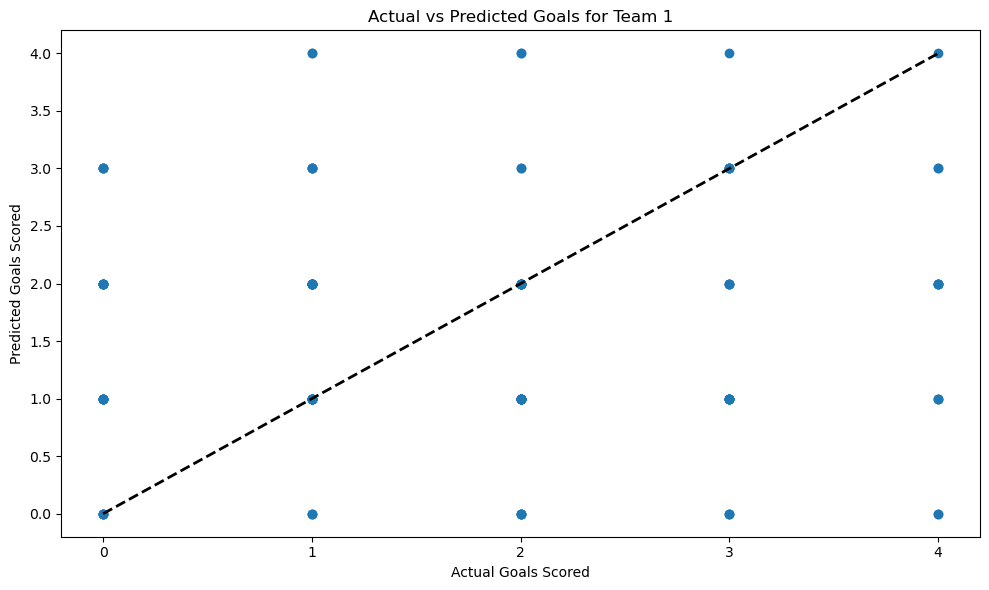

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import mord

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score'])  # Features

# Create a multi-class target variable for Team 1 scores (0, 1, 2, 3, or more)
y = pd.cut(data['Team 1 Score'], bins=[-1, 0, 1, 2, 3, float('inf')], labels=[0, 1, 2, 3, 4]).astype(int)

# Number of folds for cross-validation
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize the ordinal regression model (e.g., using `mord`)
model = mord.LogisticAT()  # Logistic model with proportional odds

# Use cross_val_predict to get predictions
predictions = cross_val_predict(model, X, y, cv=kf)

# Evaluate the performance
accuracy = accuracy_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

# Print results
print(f'Accuracy of the Ordinal Regression Model: {accuracy:.4f}')
print("Confusion Matrix:")
print(conf_matrix)

# Plot actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
plt.plot([0, 4], [0, 4], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Goals Scored')
plt.ylabel('Predicted Goals Scored')
plt.title('Actual vs Predicted Goals for Team 1')
plt.xticks([0, 1, 2, 3, 4])
plt.tight_layout()
plt.show()


Model: > 0 Goals
Average Accuracy: 0.7410
Confusion Matrix:
[[  1  29]
 [  7 102]]



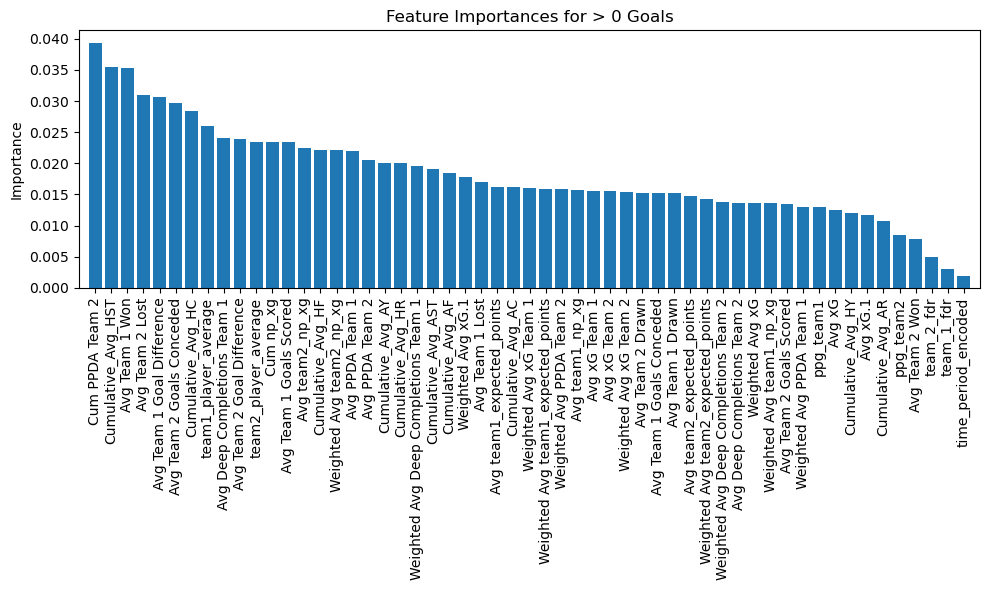

Model: > 1 Goals
Average Accuracy: 0.5899
Confusion Matrix:
[[71 16]
 [41 11]]



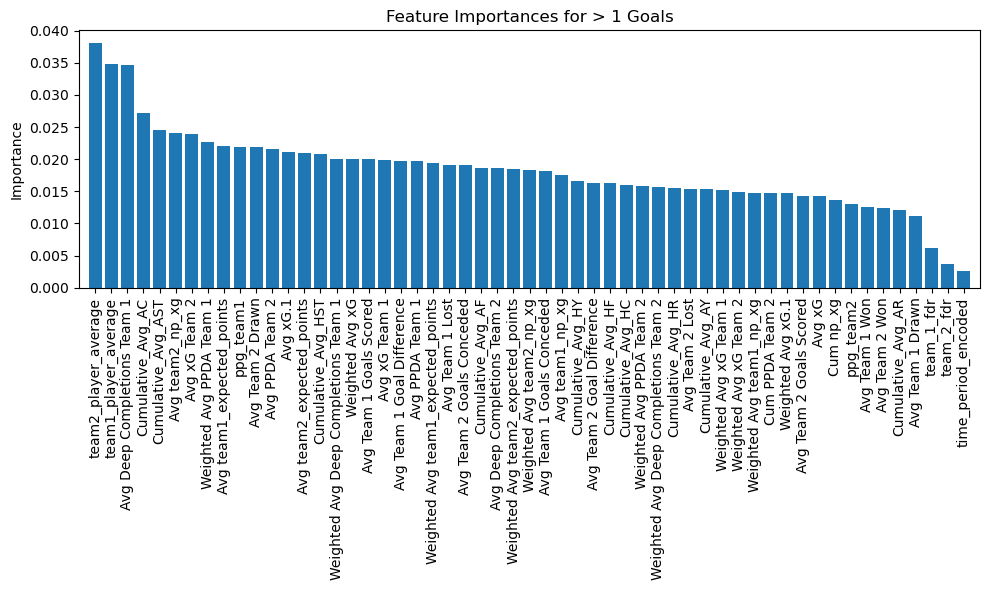

Model: > 2 Goals
Average Accuracy: 0.8270
Confusion Matrix:
[[115   2]
 [ 22   0]]



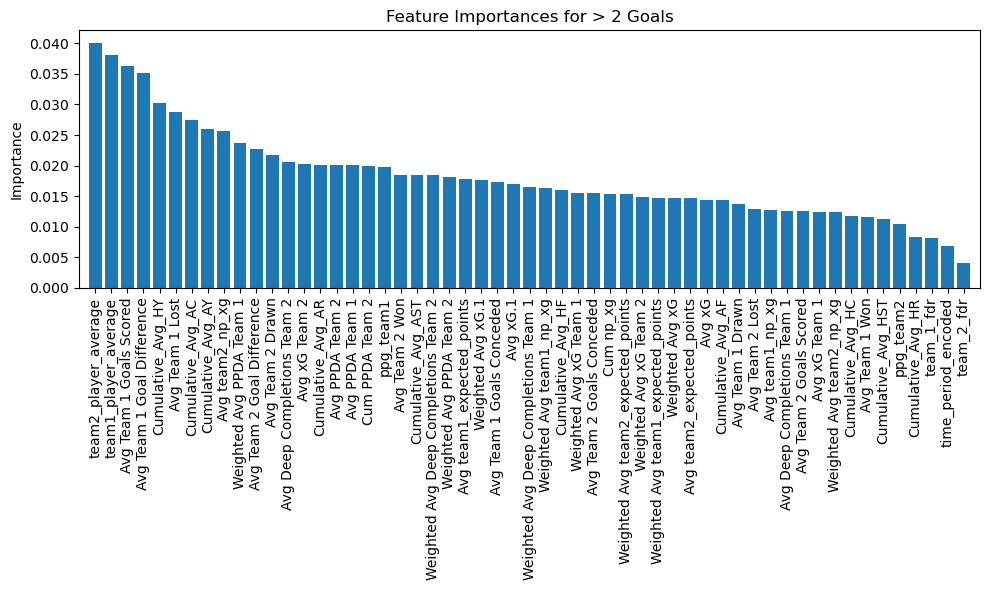

Model: > 3 Goals
Average Accuracy: 0.9497
Confusion Matrix:
[[132   0]
 [  7   0]]



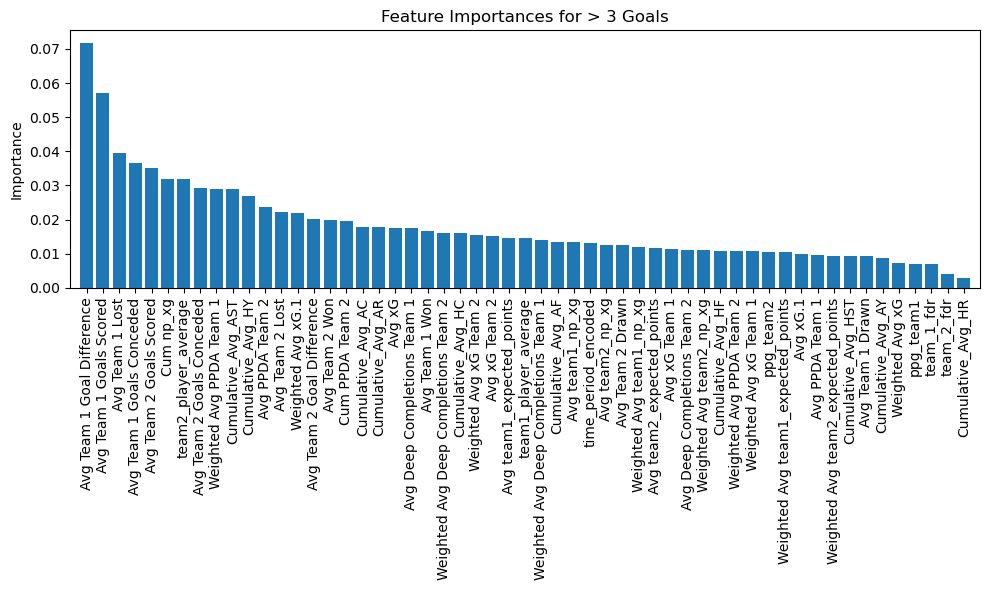

In [46]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 2 Score'])  # Features

# Create binary target variables for Team 2 scores >0, >1, >2, and >3 goals
y_gt_0 = (data['Team 2 Score'] > 0).astype(int)
y_gt_1 = (data['Team 2 Score'] > 1).astype(int)
y_gt_2 = (data['Team 2 Score'] > 2).astype(int)
y_gt_3 = (data['Team 2 Score'] > 3).astype(int)

# List of targets and model names for Team 2
targets = [y_gt_0, y_gt_1, y_gt_2, y_gt_3]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals', '> 3 Goals']

# Dictionary to store models and their results
results = {}

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each target and train a binary classifier using K-Fold
for i, y in enumerate(targets):
    accuracies = []
    conf_matrices = []
    feature_importances = np.zeros(X.shape[1])  # Initialize feature importances

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train a binary classification model (using Random Forest as an example)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Specify labels explicitly
        
        # Store results
        accuracies.append(accuracy)
        conf_matrices.append(conf_matrix)

        # Add feature importances for this fold
        feature_importances += model.feature_importances_

    # Average accuracy and confusion matrix over all folds
    results[model_names[i]] = {
        'average_accuracy': np.mean(accuracies),
        'confusion_matrix': np.sum(conf_matrices, axis=0),
        'feature_importance': feature_importances / kf.get_n_splits()  # Normalize by number of splits
    }

# Print results for each model for Team 2
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    indices = np.argsort(metrics['feature_importance'])[::-1]
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(X.shape[1]), metrics['feature_importance'][indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 2 Score'])  # Features

# Create binary target variables for Team 2 scores >0, >1, >2, and >3 goals
y_gt_0 = (data['Team 2 Score'] > 0).astype(int)
y_gt_1 = (data['Team 2 Score'] > 1).astype(int)
y_gt_2 = (data['Team 2 Score'] > 2).astype(int)
y_gt_3 = (data['Team 2 Score'] > 3).astype(int)

# List of targets and model names for Team 2
targets = [y_gt_0, y_gt_1, y_gt_2]
model_names = ['> 0 Goals', '> 1 Goals', '> 2 Goals']

# Dictionary to store models and their results
results = {}

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models for stacking
base_models = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(len(targets))]

# Collect predictions for stacking
stacked_predictions = np.zeros((X.shape[0], len(base_models)))

# Loop through each target and train base classifiers
for i, (model, y) in enumerate(zip(base_models, targets)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions[:, i] = fold_predictions
    # Store results
    results[model_names[i]] = {
        'average_accuracy': accuracy_score(y, fold_predictions),
        'confusion_matrix': confusion_matrix(y, fold_predictions),
    }

# Print base model results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()  # For better readability

# Stacking model to predict >3 goals
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_gt_3)

# Predictions with the stacking model
final_predictions = meta_model.predict(stacked_predictions)

# Final model performance
final_accuracy = accuracy_score(y_gt_3, final_predictions)
final_conf_matrix = confusion_matrix(y_gt_3, final_predictions)

print("Stacking Model Results:")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)


Model: > 0 Goals
Average Accuracy: 0.7410
Confusion Matrix:
[[  1  29]
 [  7 102]]

Model: > 1 Goals
Average Accuracy: 0.5899
Confusion Matrix:
[[71 16]
 [41 11]]

Model: > 2 Goals
Average Accuracy: 0.8273
Confusion Matrix:
[[115   2]
 [ 22   0]]

Stacking Model Results:
Final Accuracy: 0.9496
Final Confusion Matrix:
[[132   0]
 [  7   0]]


In [48]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 2 Score', 
    'Prev Team 2 Goal Difference', 
    'Prev Team 1 Form',
    'Prev Team 2 Form', 
    'Prev Team 2 Points', 
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Create binary target variables for Team 1 scores >0, >1, >2, and >3 goals
y_gt_0_team1 = (data['Team 1 Score'] > 0).astype(int)
y_gt_1_team1 = (data['Team 1 Score'] > 1).astype(int)
y_gt_2_team1 = (data['Team 1 Score'] > 2).astype(int)
y_gt_3_team1 = (data['Team 1 Score'] > 3).astype(int)

# Create binary target variables for Team 2 scores >0, >1, >2, and >3 goals
y_gt_0_team2 = (data['Team 2 Score'] > 0).astype(int)
y_gt_1_team2 = (data['Team 2 Score'] > 1).astype(int)
y_gt_2_team2 = (data['Team 2 Score'] > 2).astype(int)
y_gt_3_team2 = (data['Team 2 Score'] > 3).astype(int)

# List of targets and model names for Team 1 and Team 2
targets_team1 = [y_gt_0_team1, y_gt_1_team1, y_gt_2_team1]
targets_team2 = [y_gt_0_team2, y_gt_1_team2, y_gt_2_team2]

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(len(targets_team1))]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(len(targets_team2))]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X.shape[0], len(base_models_team2)))

# K-Fold cross-validation for base models of Team 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (model, y) in enumerate(zip(base_models_team1, targets_team1)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# K-Fold cross-validation for base models of Team 2
for i, (model, y) in enumerate(zip(base_models_team2, targets_team2)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict >3 goals for Team 1
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_gt_3_team1)

# Predictions with the stacking model for Team 1
final_predictions = meta_model.predict(stacked_predictions)

# Final model performance for Team 1
final_accuracy = accuracy_score(y_gt_3_team1, final_predictions)
final_conf_matrix = confusion_matrix(y_gt_3_team1, final_predictions)

print("Stacking Model Results for Team 1:")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)


Model: > 0 Goals (Team 1)
Average Accuracy: 0.8058
Confusion Matrix:
[[  1  23]
 [  4 111]]

Model: > 1 Goals (Team 1)
Average Accuracy: 0.5180
Confusion Matrix:
[[28 40]
 [27 44]]

Model: > 2 Goals (Team 1)
Average Accuracy: 0.7194
Confusion Matrix:
[[97  8]
 [31  3]]

Stacking Model Results for Team 1:
Final Accuracy: 0.9065
Final Confusion Matrix:
[[126   0]
 [ 13   0]]


In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Create binary target variables for Team 1 scores >0, >1, >2, and >3 goals
y_gt_0_team1 = (data['Team 1 Score'] > 0).astype(int)
y_gt_1_team1 = (data['Team 1 Score'] > 1).astype(int)
y_gt_2_team1 = (data['Team 1 Score'] > 2).astype(int)
y_gt_3_team1 = (data['Team 1 Score'] > 3).astype(int)

# Create binary target variables for Team 2 scores >0, >1, >2, and >3 goals
y_gt_0_team2 = (data['Team 2 Score'] > 0).astype(int)
y_gt_1_team2 = (data['Team 2 Score'] > 1).astype(int)
y_gt_2_team2 = (data['Team 2 Score'] > 2).astype(int)
y_gt_3_team2 = (data['Team 2 Score'] > 3).astype(int)

# List of targets and model names for Team 1 and Team 2
targets_team1 = [y_gt_0_team1, y_gt_1_team1, y_gt_2_team1]
targets_team2 = [y_gt_0_team2, y_gt_1_team2, y_gt_2_team2]

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(len(targets_team1))]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(len(targets_team2))]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X.shape[0], len(base_models_team2)))

# K-Fold cross-validation for base models of Team 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, (model, y) in enumerate(zip(base_models_team1, targets_team1)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# K-Fold cross-validation for base models of Team 2
for i, (model, y) in enumerate(zip(base_models_team2, targets_team2)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models for stacking
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict >3 goals for Team 1
meta_model_team1 = LogisticRegression()
meta_model_team1.fit(stacked_predictions, y_gt_3_team1)

# Predictions with the stacking model for Team 1
final_predictions_team1 = meta_model_team1.predict(stacked_predictions)

# Final model performance for Team 1
final_accuracy_team1 = accuracy_score(y_gt_3_team1, final_predictions_team1)
final_conf_matrix_team1 = confusion_matrix(y_gt_3_team1, final_predictions_team1)

print("Stacking Model Results for Team 1:")
print(f"Final Accuracy: {final_accuracy_team1:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team1)

# Stacking model to predict >3 goals for Team 2
meta_model_team2 = LogisticRegression()
meta_model_team2.fit(stacked_predictions, y_gt_3_team2)

# Predictions with the stacking model for Team 2
final_predictions_team2 = meta_model_team2.predict(stacked_predictions)

# Final model performance for Team 2
final_accuracy_team2 = accuracy_score(y_gt_3_team2, final_predictions_team2)
final_conf_matrix_team2 = confusion_matrix(y_gt_3_team2, final_predictions_team2)

print("\nStacking Model Results for Team 2:")
print(f"Final Accuracy: {final_accuracy_team2:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team2)


Stacking Model Results for Team 1:
Final Accuracy: 0.9218
Final Confusion Matrix:
[[165   0]
 [ 14   0]]

Stacking Model Results for Team 2:
Final Accuracy: 0.9330
Final Confusion Matrix:
[[167   0]
 [ 12   0]]


In [4]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Create binary target variable for both teams scoring
y_both_score = ((data['Team 1 Score'] > 0) & (data['Team 2 Score'] > 0)).astype(int)

# List of targets for Team 1 and Team 2
targets_team1 = [(data['Team 1 Score'] > 0).astype(int)]  # Target for Team 1 scoring >0
targets_team2 = [(data['Team 2 Score'] > 0).astype(int)]  # Target for Team 2 scoring >0

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team1]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team2]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X.shape[0], len(base_models_team2)))

# K-Fold cross-validation for base models of Team 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, (model, y) in enumerate(zip(base_models_team1, targets_team1)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# K-Fold cross-validation for base models of Team 2
for i, (model, y) in enumerate(zip(base_models_team2, targets_team2)):
    fold_predictions = np.zeros(X.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models for stacking
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict if both teams score
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_both_score)

# Predictions with the stacking model
final_predictions = meta_model.predict(stacked_predictions)

# Final model performance
final_accuracy = accuracy_score(y_both_score, final_predictions)
final_conf_matrix = confusion_matrix(y_both_score, final_predictions)

print("Stacking Model Results for Both Teams Scoring:")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)


Stacking Model Results for Both Teams Scoring:
Final Accuracy: 0.6257
Final Confusion Matrix:
[[  8  62]
 [  5 104]]


Stacking Model Results for Team 1:
Final Accuracy: 0.7877
Final Confusion Matrix:
[[141   0]
 [ 38   0]]

Stacking Model Results for Team 2:
Final Accuracy: 0.8324
Final Confusion Matrix:
[[149   0]
 [ 30   0]]


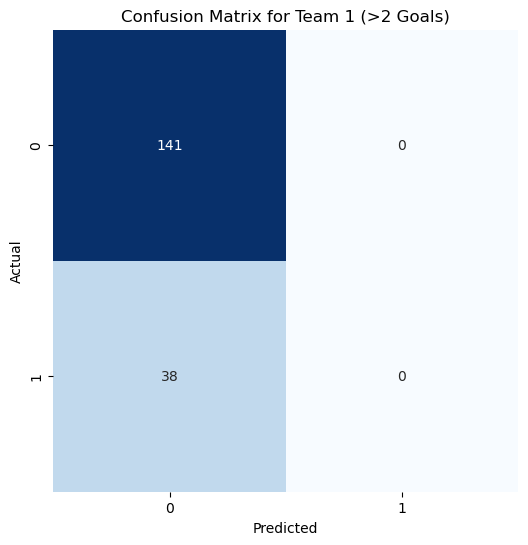

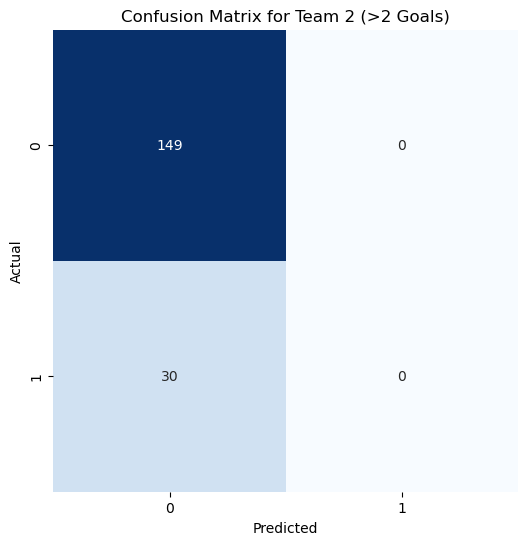

In [7]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create binary target variables for Team 1 and Team 2 scores >2 goals
y_gt_2_team1 = (data['Team 1 Score'] > 2).astype(int)
y_gt_2_team2 = (data['Team 2 Score'] > 2).astype(int)

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X_scaled.shape[0], len(base_models_team2)))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, model in enumerate(base_models_team1):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_2_team1.iloc[train_index], y_gt_2_team1.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# Train base models for Team 2
for i, model in enumerate(base_models_team2):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_2_team2.iloc[train_index], y_gt_2_team2.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models for stacking
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict >2 goals for Team 1
meta_model_team1 = LogisticRegression()
meta_model_team1.fit(stacked_predictions, y_gt_2_team1)

# Predictions with the stacking model for Team 1
final_predictions_team1 = meta_model_team1.predict(stacked_predictions)

# Final model performance for Team 1
final_accuracy_team1 = accuracy_score(y_gt_2_team1, final_predictions_team1)
final_conf_matrix_team1 = confusion_matrix(y_gt_2_team1, final_predictions_team1)

print("Stacking Model Results for Team 1:")
print(f"Final Accuracy: {final_accuracy_team1:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team1)

# Stacking model to predict >2 goals for Team 2
meta_model_team2 = LogisticRegression()
meta_model_team2.fit(stacked_predictions, y_gt_2_team2)

# Predictions with the stacking model for Team 2
final_predictions_team2 = meta_model_team2.predict(stacked_predictions)

# Final model performance for Team 2
final_accuracy_team2 = accuracy_score(y_gt_2_team2, final_predictions_team2)
final_conf_matrix_team2 = confusion_matrix(y_gt_2_team2, final_predictions_team2)

print("\nStacking Model Results for Team 2:")
print(f"Final Accuracy: {final_accuracy_team2:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team2)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Team 1
plot_confusion_matrix(final_conf_matrix_team1, "Confusion Matrix for Team 1 (>2 Goals)")

# Plot for Team 2
plot_confusion_matrix(final_conf_matrix_team2, "Confusion Matrix for Team 2 (>2 Goals)")


In [34]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create binary target variable for both teams scoring
y_both_score = ((data['Team 1 Score'] > 0) & (data['Team 2 Score'] > 0)).astype(int)

# List of targets for Team 1 and Team 2
targets_team1 = [(data['Team 1 Score'] > 0).astype(int)]  # Target for Team 1 scoring >0
targets_team2 = [(data['Team 2 Score'] > 0).astype(int)]  # Target for Team 2 scoring >0

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team1]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team2]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X_scaled.shape[0], len(base_models_team2)))

# K-Fold cross-validation for base models of Team 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, (model, y) in enumerate(zip(base_models_team1, targets_team1)):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# K-Fold cross-validation for base models of Team 2
for i, (model, y) in enumerate(zip(base_models_team2, targets_team2)):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models for stacking
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict if both teams score
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_both_score)

# Predictions with the stacking model
final_predictions = meta_model.predict(stacked_predictions)

# Final model performance
final_accuracy = accuracy_score(y_both_score, final_predictions)
final_conf_matrix = confusion_matrix(y_both_score, final_predictions)

print("Stacking Model Results for Both Teams Scoring:")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)


Stacking Model Results for Both Teams Scoring:
Final Accuracy: 0.6257
Final Confusion Matrix:
[[  8  62]
 [  5 104]]


In [35]:
import pandas as pd
import numpy as np

# Load the prediction table
prediction_file_path = r"C:\Users\harih\OneDrive\Desktop\AI Final Project\prediction_data (1).csv"
prediction_data = pd.read_csv(prediction_file_path)

# Preprocess the prediction data: Drop unnecessary columns
prediction_data_cleaned = prediction_data.drop(columns=[
    'Team 1', 
    'Team 2', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], errors='ignore')  # Use `errors='ignore'` to avoid errors if these columns don't exist

# Ensure the same feature order as the training data
prediction_data_cleaned = prediction_data_cleaned[X.columns]

# Use the scaling applied during training (make sure you have the scaler defined)
# For example: scaler = StandardScaler().fit(X)  # Ensure you have this from your training
prediction_data_scaled = pd.DataFrame(scaler.transform(prediction_data_cleaned), columns=X.columns)

# Initialize arrays to hold predictions for Team 1 and Team 2
stacked_predictions_team1 = np.zeros((prediction_data_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((prediction_data_scaled.shape[0], len(base_models_team2)))

# Generate predictions for Team 1
for i, model in enumerate(base_models_team1):
    stacked_predictions_team1[:, i] = model.predict(prediction_data_scaled)

# Generate predictions for Team 2
for i, model in enumerate(base_models_team2):
    stacked_predictions_team2[:, i] = model.predict(prediction_data_scaled)

# Combine predictions from Team 1 and Team 2 base models
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Use the stacking model to make predictions for all fixtures
predictions_for_fixtures = meta_model.predict(stacked_predictions)

# Get probabilities for the predictions
predicted_probabilities = meta_model.predict_proba(stacked_predictions)

# Add predictions and probabilities back to the original prediction table
prediction_data['Both_Teams_Score_Prediction'] = predictions_for_fixtures
prediction_data['Probability_Both_Teams_Score'] = predicted_probabilities[:, 1]  # Probability of class 1

# Display the results for the first 2 fixtures
prediction_results = prediction_data[['Team 1', 'Team 2', 'Both_Teams_Score_Prediction', 'Probability_Both_Teams_Score']].head(2)
print("Predictions for the First 2 Fixtures:")
print(prediction_results)


Predictions for the First 2 Fixtures:
      Team 1         Team 2  Both_Teams_Score_Prediction  \
0  Brentford        Arsenal                            0   
1  Tottenham  Newcastle Utd                            1   

   Probability_Both_Teams_Score  
0                      0.489759  
1                      0.615147  


Final Stacking Model Results for Team 1 (>2 Goals):
Final Accuracy: 0.7877
Final Confusion Matrix:
[[141   0]
 [ 38   0]]

Final Stacking Model Results for Team 2 (>2 Goals):
Final Accuracy: 0.8324
Final Confusion Matrix:
[[149   0]
 [ 30   0]]


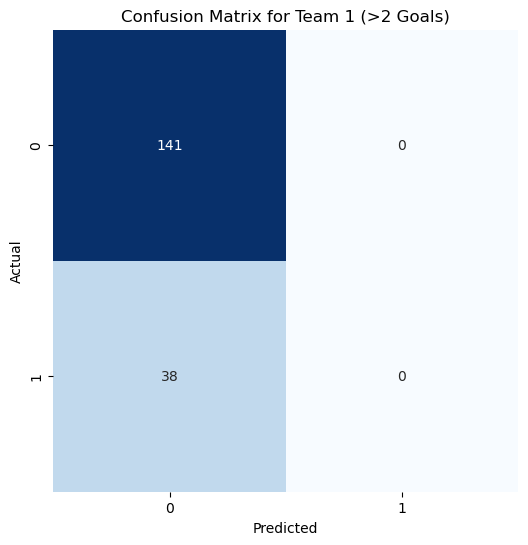

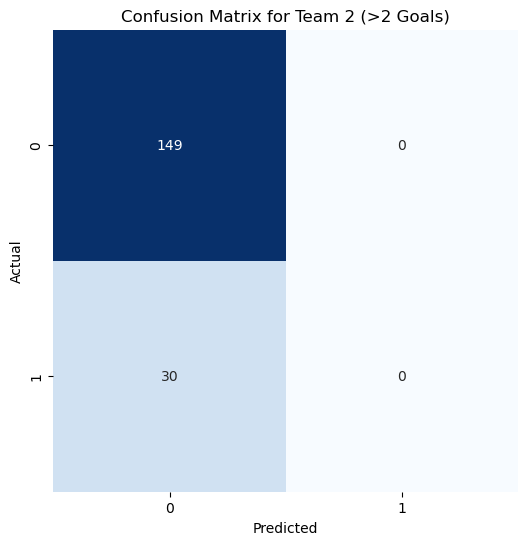

In [29]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define binary target variables for >2 goals for Team 1 and Team 2
y_gt_team1 = (data['Team 1 Score'] > 2).astype(int)
y_gt_team2 = (data['Team 2 Score'] > 2).astype(int)

# Initialize base models for each threshold for both teams
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X_scaled.shape[0], len(base_models_team2)))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, model in enumerate(base_models_team1):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_team1.iloc[train_index], y_gt_team1.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# Train base models for Team 2
for i, model in enumerate(base_models_team2):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_team2.iloc[train_index], y_gt_team2.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Initialize meta-models for both teams
meta_model_team1 = LogisticRegression()
meta_model_team2 = LogisticRegression()

# Train meta-model on stacked predictions for Team 1
meta_model_team1.fit(stacked_predictions_team1, y_gt_team1)

# Train meta-model on stacked predictions for Team 2
meta_model_team2.fit(stacked_predictions_team2, y_gt_team2)

# Final predictions for both teams to score >2 goals
final_predictions_team1 = meta_model_team1.predict(stacked_predictions_team1)
final_predictions_team2 = meta_model_team2.predict(stacked_predictions_team2)

# Print final results for both teams
final_accuracy_team1 = accuracy_score(y_gt_team1, final_predictions_team1)
final_conf_matrix_team1 = confusion_matrix(y_gt_team1, final_predictions_team1)

print(f"Final Stacking Model Results for Team 1 (>2 Goals):")
print(f"Final Accuracy: {final_accuracy_team1:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team1)

final_accuracy_team2 = accuracy_score(y_gt_team2, final_predictions_team2)
final_conf_matrix_team2 = confusion_matrix(y_gt_team2, final_predictions_team2)

print(f"\nFinal Stacking Model Results for Team 2 (>2 Goals):")
print(f"Final Accuracy: {final_accuracy_team2:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team2)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Team 1
plot_confusion_matrix(final_conf_matrix_team1, "Confusion Matrix for Team 1 (>2 Goals)")

# Plot for Team 2
plot_confusion_matrix(final_conf_matrix_team2, "Confusion Matrix for Team 2 (>2 Goals)")


Final Stacking Model Results for Team 1 (>2 Goals):
Final Accuracy: 0.7877
Final Confusion Matrix:
[[141   0]
 [ 38   0]]

Final Stacking Model Results for Team 2 (>2 Goals):
Final Accuracy: 0.8324
Final Confusion Matrix:
[[149   0]
 [ 30   0]]


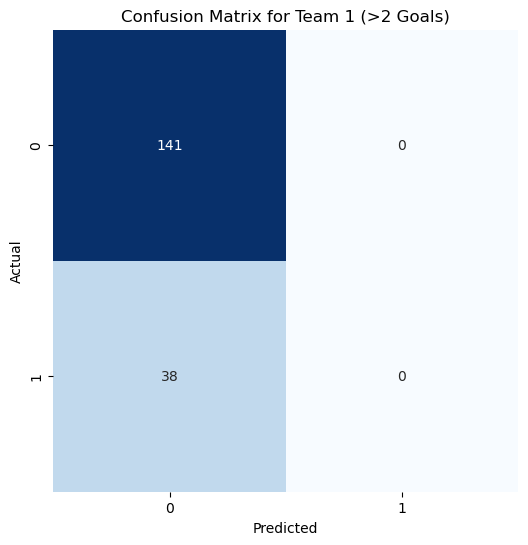

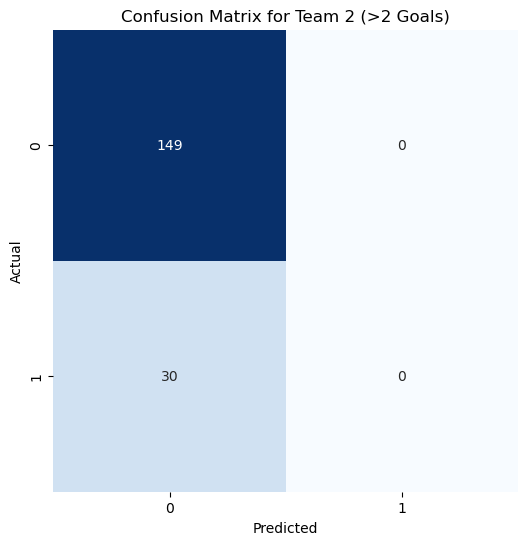

   Team 1 > 2 Goals Prediction  Team 1 > 2 Goals Probability  \
0                            0                      0.213448   
1                            0                      0.213448   
2                            0                      0.213448   
3                            0                      0.213448   
4                            0                      0.213448   
5                            0                      0.213448   
6                            0                      0.213448   
7                            0                      0.213448   
8                            0                      0.213448   
9                            0                      0.213448   

   Team 2 > 2 Goals Prediction  Team 2 > 2 Goals Probability  
0                            0                      0.397805  
1                            0                      0.162337  
2                            0                      0.162337  
3                            0             

In [48]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define binary target variables for >2 goals for Team 1 and Team 2
y_gt_team1 = (data['Team 1 Score'] > 2).astype(int)
y_gt_team2 = (data['Team 2 Score'] > 2).astype(int)

# Initialize base models for each threshold for both teams
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in range(3)]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X_scaled.shape[0], len(base_models_team2)))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, model in enumerate(base_models_team1):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_team1.iloc[train_index], y_gt_team1.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# Train base models for Team 2
for i, model in enumerate(base_models_team2):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y_gt_team2.iloc[train_index], y_gt_team2.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Initialize meta-models for both teams
meta_model_team1 = LogisticRegression()
meta_model_team2 = LogisticRegression()

# Train meta-model on stacked predictions for Team 1
meta_model_team1.fit(stacked_predictions_team1, y_gt_team1)

# Train meta-model on stacked predictions for Team 2
meta_model_team2.fit(stacked_predictions_team2, y_gt_team2)

# Final predictions for both teams to score >2 goals
final_predictions_team1 = meta_model_team1.predict(stacked_predictions_team1)
final_predictions_team2 = meta_model_team2.predict(stacked_predictions_team2)

# Print final results for both teams
final_accuracy_team1 = accuracy_score(y_gt_team1, final_predictions_team1)
final_conf_matrix_team1 = confusion_matrix(y_gt_team1, final_predictions_team1)

print(f"Final Stacking Model Results for Team 1 (>2 Goals):")
print(f"Final Accuracy: {final_accuracy_team1:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team1)

final_accuracy_team2 = accuracy_score(y_gt_team2, final_predictions_team2)
final_conf_matrix_team2 = confusion_matrix(y_gt_team2, final_predictions_team2)

print(f"\nFinal Stacking Model Results for Team 2 (>2 Goals):")
print(f"Final Accuracy: {final_accuracy_team2:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix_team2)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Team 1
plot_confusion_matrix(final_conf_matrix_team1, "Confusion Matrix for Team 1 (>2 Goals)")

# Plot for Team 2
plot_confusion_matrix(final_conf_matrix_team2, "Confusion Matrix for Team 2 (>2 Goals)")

# Load the new data (ensure it has the same features as the training data)
new_file_path = r"C:\Users\harih\OneDrive\Desktop\AI Final Project\prediction_data (1).csv"
new_data = pd.read_csv(new_file_path)

# Drop unnecessary columns (same as before)
new_data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 
    'H2H_Away_Total_Wins_Last_4', 
    'H2H_Draws_Last_4'
], inplace=True)

# Define features for new data
X_new = new_data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Ensure this has the same features as X

# Standardize the features using the same scaler as before
X_new_scaled = pd.DataFrame(scaler.transform(X_new), columns=X_new.columns)

# Initialize arrays to store predictions for >2 goals for each team
stacked_predictions_new_team1 = np.zeros((X_new_scaled.shape[0], len(base_models_team1)))
stacked_predictions_new_team2 = np.zeros((X_new_scaled.shape[0], len(base_models_team2)))

# Use the trained base models to predict on new data for Team 1
for i, model in enumerate(base_models_team1):
    stacked_predictions_new_team1[:, i] = model.predict(X_new_scaled)

# Use the trained base models to predict on new data for Team 2
for i, model in enumerate(base_models_team2):
    stacked_predictions_new_team2[:, i] = model.predict(X_new_scaled)

# Make predictions using the meta-models for new data
final_predictions_new_team1 = meta_model_team1.predict(stacked_predictions_new_team1)
final_predictions_new_team2 = meta_model_team2.predict(stacked_predictions_new_team2)

# Output the predictions
new_data['Team 1 > 2 Goals Prediction'] = final_predictions_new_team1
new_data['Team 2 > 2 Goals Prediction'] = final_predictions_new_team2

# Get predicted probabilities for the meta-models for new data
probabilities_team1 = meta_model_team1.predict_proba(stacked_predictions_new_team1)
probabilities_team2 = meta_model_team2.predict_proba(stacked_predictions_new_team2)

# Add probabilities to the new_data DataFrame
new_data['Team 1 > 2 Goals Probability'] = probabilities_team1[:, 1]  # Probability of >2 goals (class 1)
new_data['Team 2 > 2 Goals Probability'] = probabilities_team2[:, 1]  # Probability of >2 goals (class 1)

# Print the predictions and probabilities after adding them to the DataFrame
print(new_data[['Team 1 > 2 Goals Prediction', 'Team 1 > 2 Goals Probability', 
                'Team 2 > 2 Goals Prediction', 'Team 2 > 2 Goals Probability']])
